In [141]:
from IPython import get_ipython;   
get_ipython().magic('reset -sf')
#https://github.com/kirbs-/hide_code

# Machine Learning

In [142]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
PATH = '/Users/alistairgj/Documents/GitHub/IoT_ResearchProject/IoT_November'
import altair as alt

In [143]:
import altair as alt

def plot_imp(target, best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=target + " " + method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.95, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

In [144]:
ds = pd.read_csv(PATH + '/intermediate_datasets/S1SubAct_B_m_NoDupes.csv', index_col = 'duration')
ds.reset_index(drop = True, inplace = True)

In [120]:
ds = pd.read_csv(PATH + '/intermediate_datasets/S1SubAct_B_m_NoDupes.csv', index_col = None)
ds.duration = pd.to_datetime(ds.duration, format='%Y-%m-%d %H:%M:%S')

In [121]:
ds.head()

,duration,subActNum_100,subActNum_101,subActNum_104,subActNum_105,subActNum_106,subActNum_107,subActNum_108,subActNum_119,subActNum_125,...,subActNum_70,subActNum_76,subActNum_81,subActNum_82,subActNum_88,subActNum_90,subActNum_92,subActNum_93,subActNum_96,subActNum_98
0,2003-03-27 06:43:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2003-03-27 06:44:00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2003-03-27 06:45:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003-03-27 06:46:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2003-03-27 06:47:00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
import pandas as pd
import numpy as np
import time
from datetime import datetime
import pandas as pd

def add_DAY_WDWE_phaseX(ds):
    dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
    dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
    ds.set_index(ds.duration, inplace = True)
    ds.insert((len(ds.columns)), "dayNumeric", ds.index.dayofweek.astype(str), True)
    ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
    ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
    ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
    ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
    ds.reset_index(drop = True, inplace = True)
    ds['HOUR'] = ds['duration'].dt.hour
    return ds

In [123]:
ds = add_DAY_WDWE_phaseX(ds)

In [150]:
ds.head()

,bathroom_toiletflush,bathroom_lightswitch,foyer_lightswitch,kitchen_lightswitch,kitchen_burner,livingroom_lightswitch,bedroom_lightswitch,kitchen_coffeemachine,kitchen_drawer,kitchen_refrigerator,...,kitchen_dishwasher,livingroom_lamp,foyer_closet,study_drawer,bathroom_sinkfaucet-cold,kitchen_laundrydryer,study_lightwitch,bathroom_showerfaucet,bathroom_exhaustfan,kitchen_garbagedisposal
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
dsStore = ds

In [126]:
dsWD = ds[ds['WDWE']=='WD']

In [127]:
morningHours = [6,7,8,9]
dsWD6till9 = dsWD[dsWD.HOUR.isin(morningHours)]
dsWD6till9 = dsWD6till9.drop(columns = ['duration', 'dayNumeric', 'DAY', 'WDWE', 'HOUR'])

In [128]:
ds = dsWD6till9

In [145]:
ds_sensors = pd.read_csv(PATH + '/intermediate_datasets/S1Sensors_preprocessedDROPPED.csv', index_col = 'subActNum')
#allSubActs = list(set(ds_sensors.concat)) #potentially useful but currently unused
poweredSubActs = list(set(ds_sensors[ds_sensors.reqEnergy].concat))

In [146]:
import json
subActNumKeyWithStringDict = pd.Series(ds_sensors.concat.values, 
                                       ds_sensors.subActNumConcat.values).to_dict()
subActNumKeyWithStringJson = json.dumps(subActNumKeyWithStringDict)
f = open(PATH + '/JSON/subActNumKeyWithStringDict.json','w')
f.write(subActNumKeyWithStringJson)
f.close()

In [147]:
ds.rename(columns=subActNumKeyWithStringDict, inplace=True)

In [148]:
poweredSubActs

['bedroom_lightswitch',
 'kitchen_laundrydryer',
 'kitchen_freezer',
 'kitchen_toaster',
 'bathroom_exhaustfan',
 'bathroom_showerfaucet',
 'bathroom_lightswitch',
 'kitchen_refrigerator',
 'foyer_lightswitch',
 'kitchen_burner',
 'study_lightwitch',
 'kitchen_washingmachine',
 'kitchen_lightswitch',
 'livingroom_lamp',
 'kitchen_microwave',
 'kitchen_garbagedisposal',
 'kitchen_coffeemachine',
 'livingroom_lightswitch',
 'kitchen_oven',
 'kitchen_dishwasher',
 'bathroom_sinkfaucet-hot']

## This is a loop for all powered subActs

BEGIN: bedroom_lightswitch
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.1s finished


best params: {'criterion': 'entropy', 'max_depth': 4}
best score: 0.9795956924239562
best features: ['bathroom_lightswitch' 'kitchen_cabinet' 'kitchen_dishwasher'
 'kitchen_laundrydryer' 'livingroom_lightswitch']
feature importances: [0.02321617 0.00763424 0.00526102 0.00518979 0.00453024]


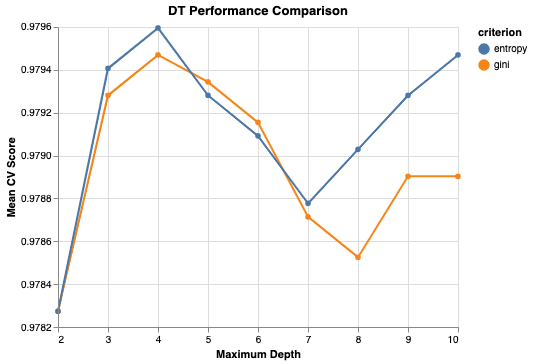

roc_auc 0.9016058183913012


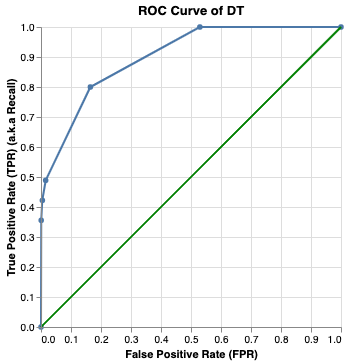

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1543
         1.0       0.94      0.36      0.52        45

    accuracy                           0.98      1588
   macro avg       0.96      0.68      0.75      1588
weighted avg       0.98      0.98      0.98      1588

[[1542    1]
 [  29   16]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.3s finished


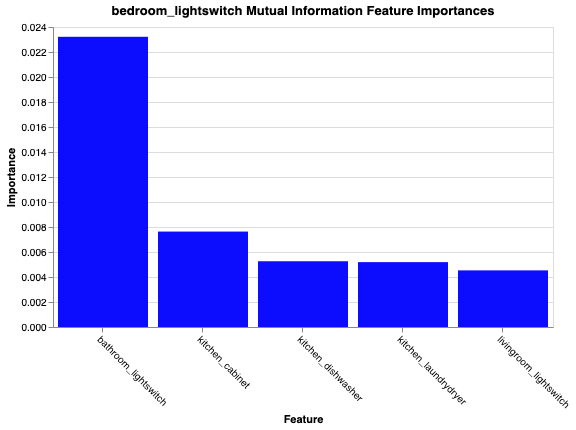

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: bedroom_lightswitch

BEGIN: kitchen_laundrydryer
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.1s finished


best params: {'criterion': 'gini', 'max_depth': 5}
best score: 0.988034510989357
best features: ['kitchen_door' 'kitchen_washingmachine' 'bathroom_medicinecabinet'
 'kitchen_dishwasher' 'bedroom_drawer']
feature importances: [0.02000316 0.01907793 0.00304493 0.00297337 0.00239561]


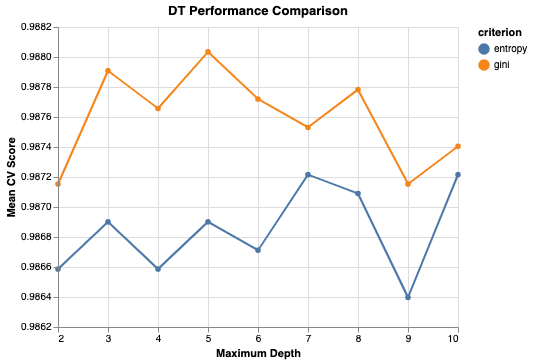

roc_auc 0.955146548131685


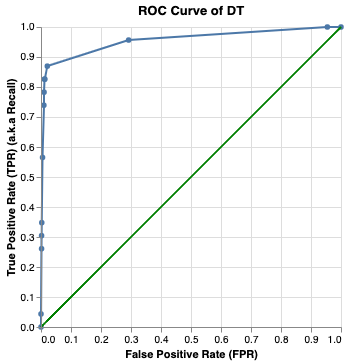

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1565
         1.0       0.70      0.30      0.42        23

    accuracy                           0.99      1588
   macro avg       0.84      0.65      0.71      1588
weighted avg       0.99      0.99      0.99      1588

[[1562    3]
 [  16    7]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    1.9s finished


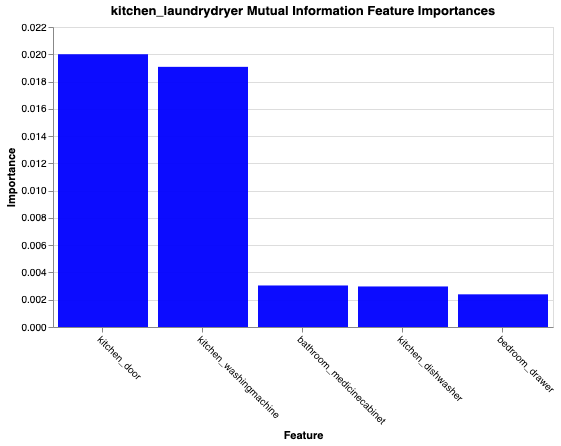

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_laundrydryer

BEGIN: kitchen_freezer
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.5s finished


best params: {'criterion': 'gini', 'max_depth': 9}
best score: 0.9164305056993514
best features: ['kitchen_refrigerator' 'livingroom_lightswitch' 'foyer_closet'
 'bathroom_door' 'bathroom_toiletflush']
feature importances: [0.02227057 0.01356473 0.01257588 0.01117677 0.01006221]


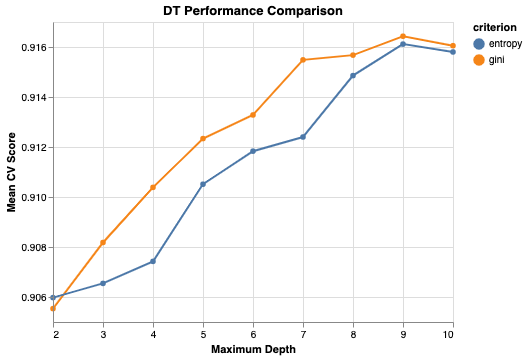

roc_auc 0.8638961647394535


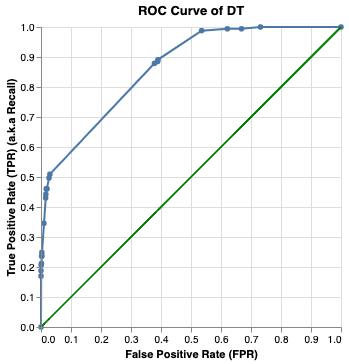

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1423
         1.0       0.76      0.44      0.56       165

    accuracy                           0.93      1588
   macro avg       0.85      0.71      0.76      1588
weighted avg       0.92      0.93      0.92      1588

[[1400   23]
 [  92   73]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.1s finished


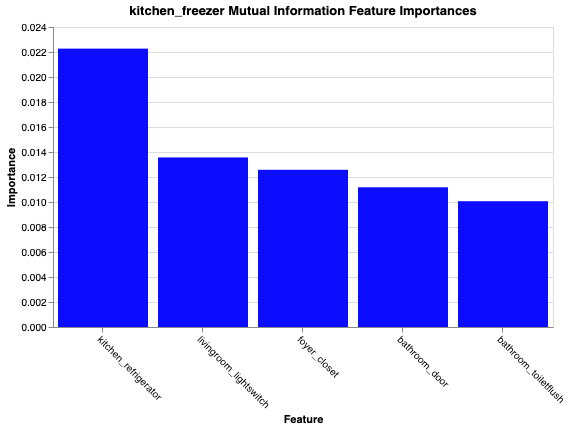

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_freezer

BEGIN: kitchen_toaster
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.5s finished


best params: {'criterion': 'gini', 'max_depth': 3}
best score: 0.9886642735688645
best features: ['kitchen_cabinet' 'bathroom_exhaustfan' 'study_lightwitch'
 'kitchen_toaster' 'livingroom_lightswitch']
feature importances: [0.00769587 0.0036906  0.00286587 0.00240961 0.00221754]


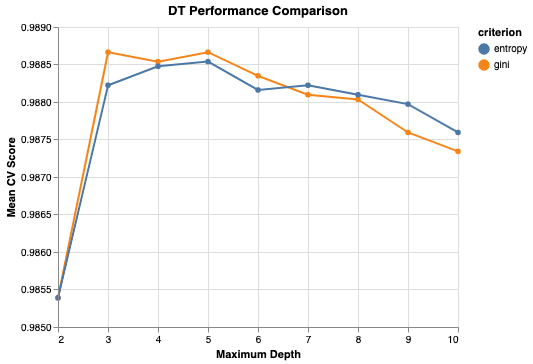

roc_auc 0.7781551143620108


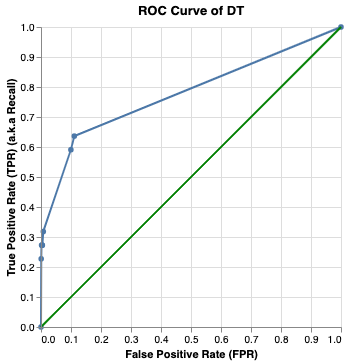

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1566
         1.0       0.83      0.23      0.36        22

    accuracy                           0.99      1588
   macro avg       0.91      0.61      0.68      1588
weighted avg       0.99      0.99      0.99      1588

[[1565    1]
 [  17    5]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.7s finished


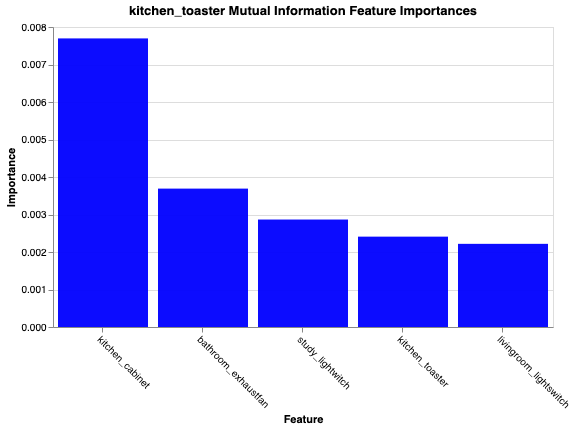

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_toaster

BEGIN: bathroom_exhaustfan
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.3s finished


best params: {'criterion': 'gini', 'max_depth': 8}
best score: 0.8798412998299641
best features: ['livingroom_lightswitch' 'bathroom_sinkfaucet-hot' 'livingroom_lamp'
 'bathroom_medicinecabinet' 'foyer_door']
feature importances: [0.0133136  0.01192201 0.01045652 0.00798162 0.00773015]


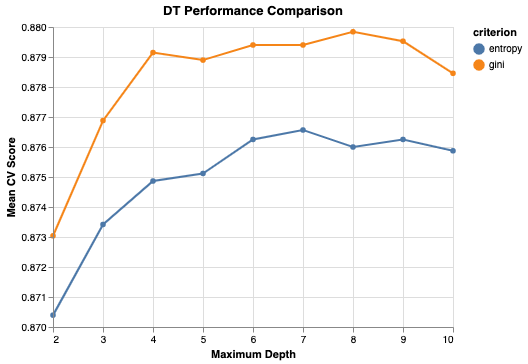

roc_auc 0.9054017199365295


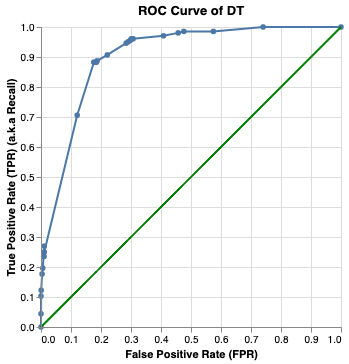

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      1384
         1.0       0.77      0.25      0.38       204

    accuracy                           0.89      1588
   macro avg       0.84      0.62      0.66      1588
weighted avg       0.88      0.89      0.87      1588

[[1369   15]
 [ 153   51]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.9s finished


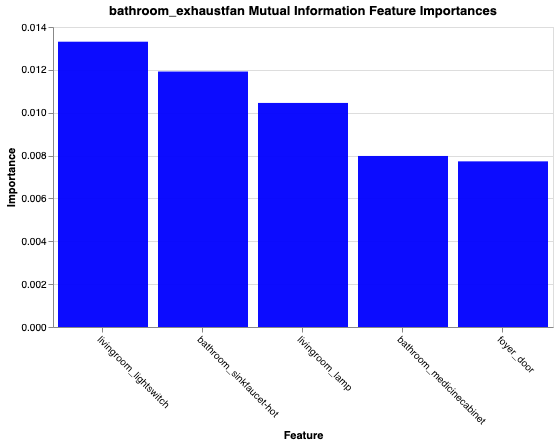

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: bathroom_exhaustfan

BEGIN: bathroom_showerfaucet
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.5s finished


best params: {'criterion': 'entropy', 'max_depth': 8}
best score: 0.9669374645758549
best features: ['bathroom_lightswitch' 'kitchen_refrigerator' 'kitchen_dishwasher'
 'foyer_door' 'kitchen_microwave']
feature importances: [0.00659859 0.00630755 0.00603909 0.00354614 0.00334867]


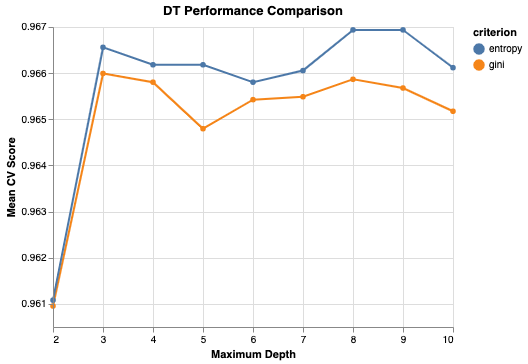

roc_auc 0.9279653637770898


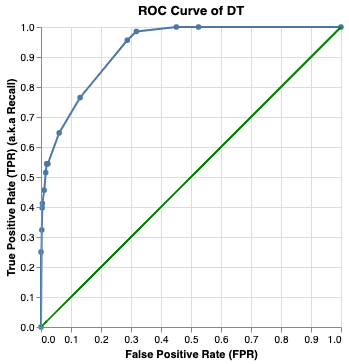

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1520
         1.0       0.82      0.40      0.53        68

    accuracy                           0.97      1588
   macro avg       0.90      0.70      0.76      1588
weighted avg       0.97      0.97      0.97      1588

[[1514    6]
 [  41   27]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.7s finished


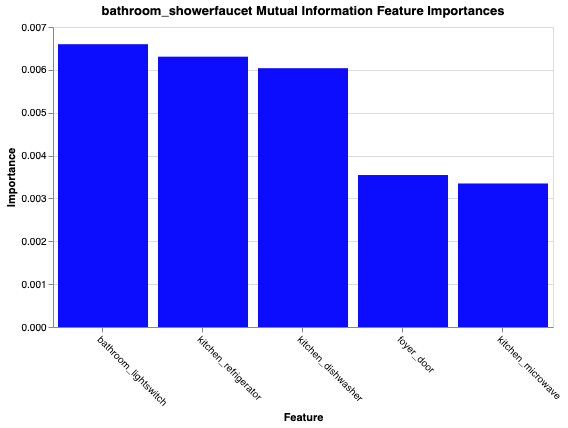

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: bathroom_showerfaucet

BEGIN: bathroom_lightswitch
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.5s finished


best params: {'criterion': 'gini', 'max_depth': 10}
best score: 0.8392216134517287
best features: ['kitchen_dishwasher' 'bedroom_drawer' 'livingroom_lightswitch'
 'bathroom_cabinet' 'foyer_lightswitch']
feature importances: [0.01883546 0.01851238 0.01808033 0.01339105 0.01182703]


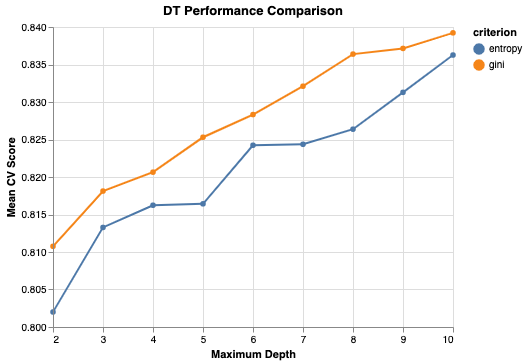

roc_auc 0.9072778625805762


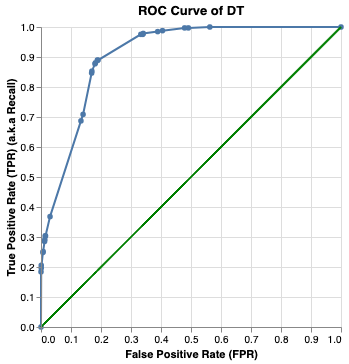

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91      1262
         1.0       0.85      0.30      0.45       326

    accuracy                           0.85      1588
   macro avg       0.85      0.64      0.68      1588
weighted avg       0.85      0.85      0.82      1588

[[1244   18]
 [ 227   99]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.0s finished


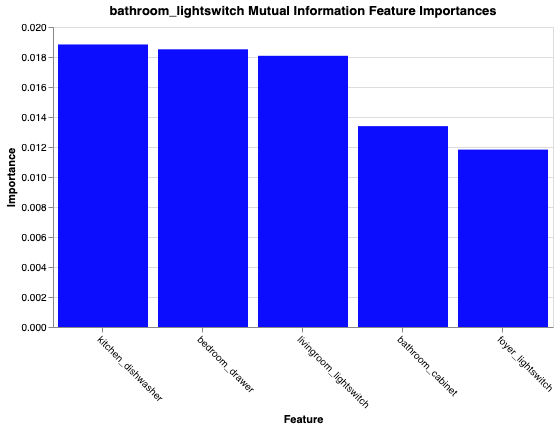

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: bathroom_lightswitch

BEGIN: kitchen_refrigerator
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.0s finished


best params: {'criterion': 'gini', 'max_depth': 10}
best score: 0.9646073430316771
best features: ['kitchen_cabinet' 'kitchen_toaster' 'kitchen_drawer'
 'kitchen_lightswitch' 'kitchen_burner']
feature importances: [0.0291453  0.02106044 0.01043089 0.00766825 0.00653047]


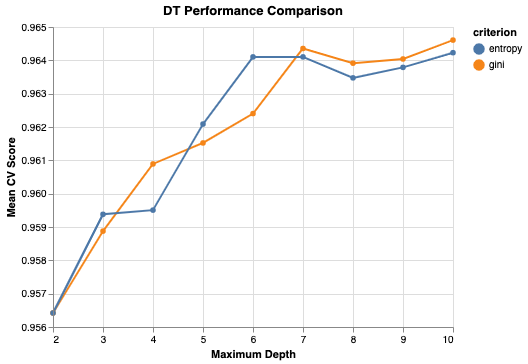

roc_auc 0.9533532536520585


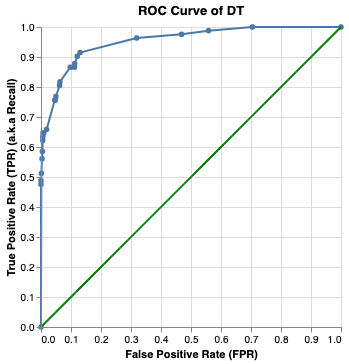

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1506
         1.0       0.95      0.51      0.67        82

    accuracy                           0.97      1588
   macro avg       0.96      0.76      0.83      1588
weighted avg       0.97      0.97      0.97      1588

[[1504    2]
 [  40   42]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.4s finished


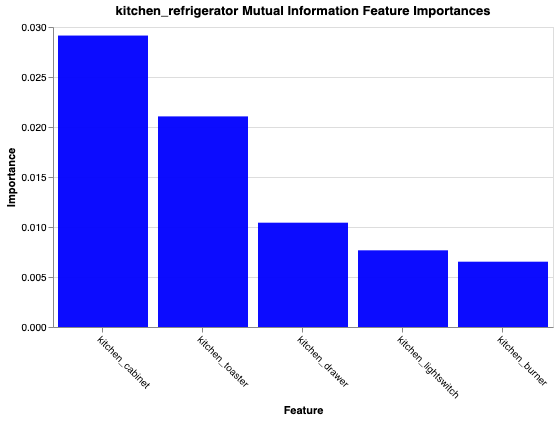

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_refrigerator

BEGIN: foyer_lightswitch
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.9s finished


best params: {'criterion': 'gini', 'max_depth': 4}
best score: 0.9894199886642736
best features: ['kitchen_burner' 'foyer_lightswitch' 'kitchen_coffeemachine'
 'kitchen_dishwasher' 'bathroom_lightswitch']
feature importances: [0.03023128 0.01647693 0.00632083 0.00507224 0.00476453]


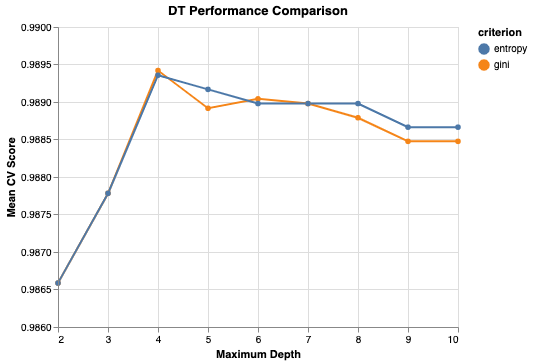

roc_auc 0.9394142670157067


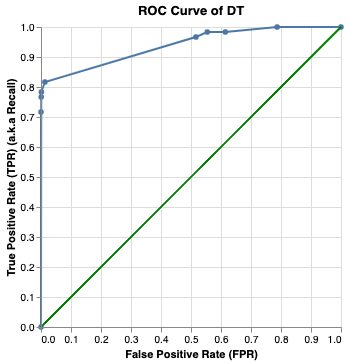

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1528
         1.0       0.98      0.77      0.86        60

    accuracy                           0.99      1588
   macro avg       0.98      0.88      0.93      1588
weighted avg       0.99      0.99      0.99      1588

[[1527    1]
 [  14   46]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.0s finished


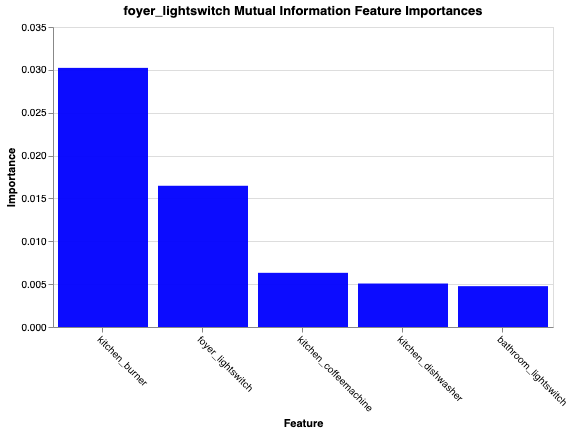

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: foyer_lightswitch

BEGIN: kitchen_burner
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.5s finished


best params: {'criterion': 'entropy', 'max_depth': 8}
best score: 0.9630329365829082
best features: ['kitchen_lightswitch' 'kitchen_door' 'bathroom_sinkfaucet-hot'
 'kitchen_drawer' 'kitchen_burner']
feature importances: [0.01236984 0.01101813 0.0088436  0.0086278  0.00797159]


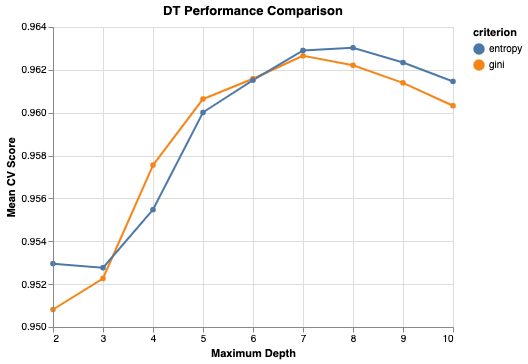

roc_auc 0.943336410455738


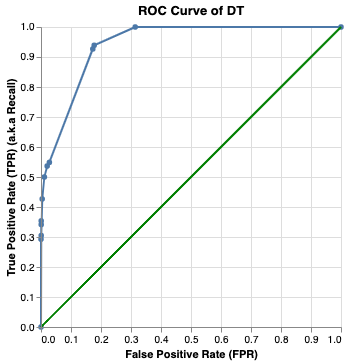

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1506
         1.0       0.97      0.34      0.50        82

    accuracy                           0.97      1588
   macro avg       0.97      0.67      0.74      1588
weighted avg       0.97      0.97      0.96      1588

[[1505    1]
 [  54   28]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.2s finished


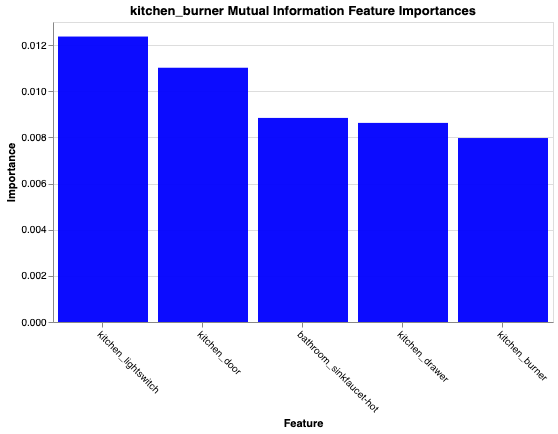

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_burner

BEGIN: study_lightwitch
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.9s finished


best params: {'criterion': 'entropy', 'max_depth': 8}
best score: 0.8873354745261036
best features: ['bathroom_cabinet' 'livingroom_lamp' 'livingroom_lightswitch'
 'kitchen_lightswitch' 'bedroom_lightswitch']
feature importances: [0.012293   0.0083491  0.00712733 0.00632045 0.00625818]


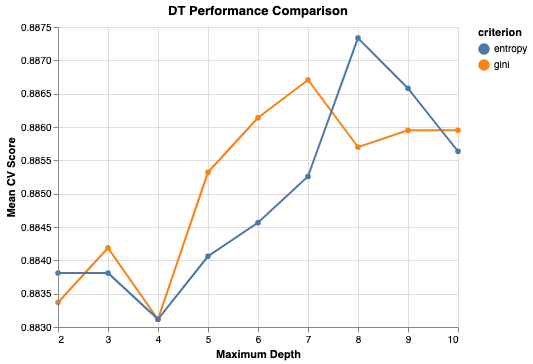

roc_auc 0.8688581559448221


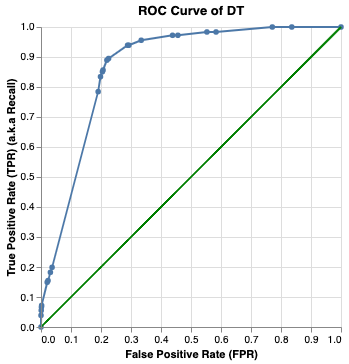

              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      1407
         1.0       0.81      0.07      0.13       181

    accuracy                           0.89      1588
   macro avg       0.85      0.53      0.54      1588
weighted avg       0.88      0.89      0.85      1588

[[1404    3]
 [ 168   13]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.3s finished


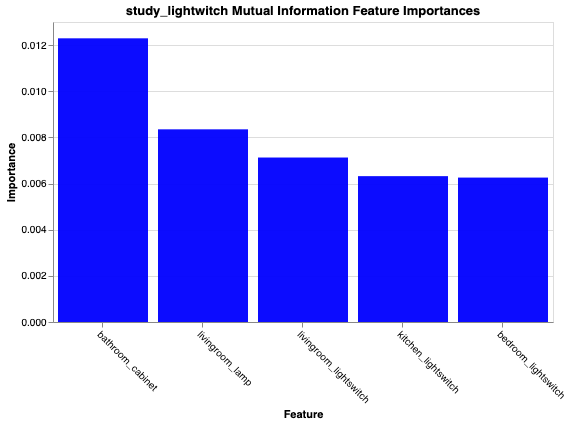

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: study_lightwitch

BEGIN: kitchen_washingmachine
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.1s finished


best params: {'criterion': 'gini', 'max_depth': 3}
best score: 0.9892310598904213
best features: ['bathroom_sinkfaucet-cold' 'kitchen_door' 'kitchen_lightswitch'
 'bathroom_exhaustfan' 'kitchen_dishwasher']
feature importances: [0.01740422 0.01163216 0.00332728 0.00220175 0.0016449 ]


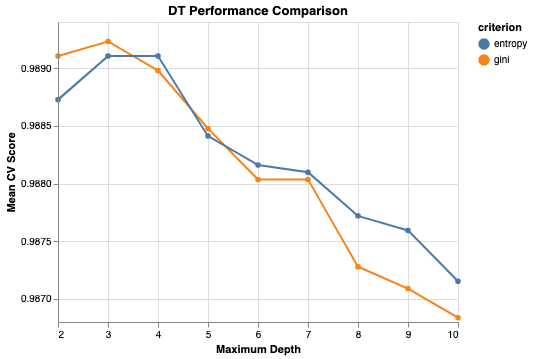

roc_auc 0.8698414261794544


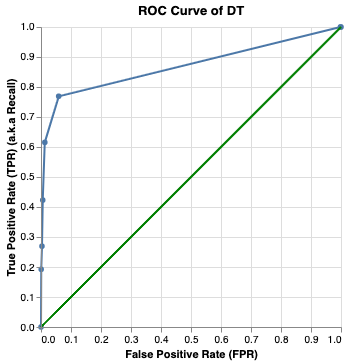

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1562
         1.0       0.83      0.19      0.31        26

    accuracy                           0.99      1588
   macro avg       0.91      0.60      0.65      1588
weighted avg       0.98      0.99      0.98      1588

[[1561    1]
 [  21    5]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.0s finished


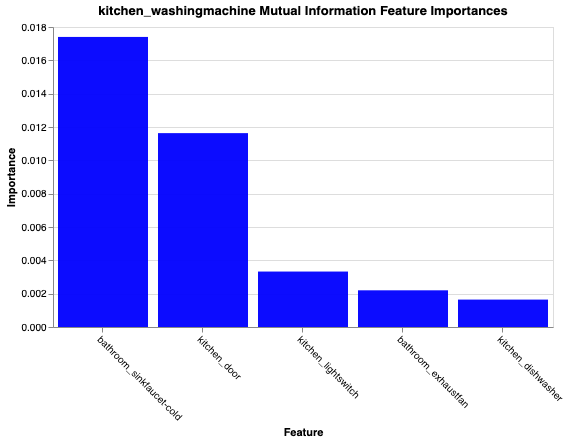

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_washingmachine

BEGIN: kitchen_lightswitch
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.4s finished


best params: {'criterion': 'gini', 'max_depth': 10}
best score: 0.797153473140626
best features: ['foyer_lightswitch' 'kitchen_refrigerator' 'kitchen_drawer'
 'bathroom_showerfaucet' 'bathroom_cabinet']
feature importances: [0.01534629 0.01504557 0.01318845 0.01318381 0.01242857]


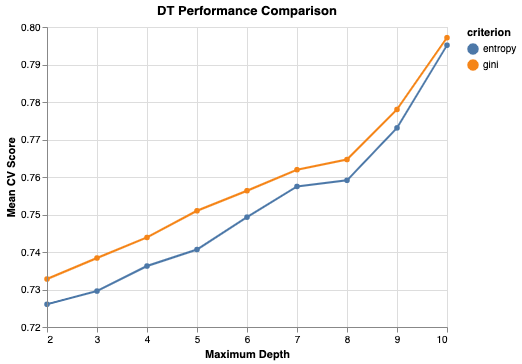

roc_auc 0.8868293591654247


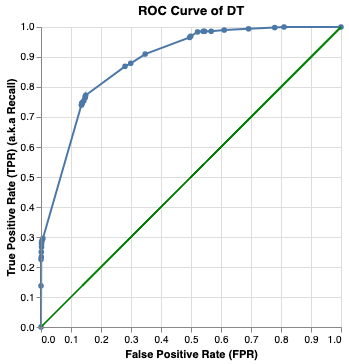

              precision    recall  f1-score   support

         0.0       0.88      0.87      0.87      1100
         1.0       0.71      0.74      0.72       488

    accuracy                           0.83      1588
   macro avg       0.80      0.80      0.80      1588
weighted avg       0.83      0.83      0.83      1588

[[952 148]
 [127 361]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.4s finished


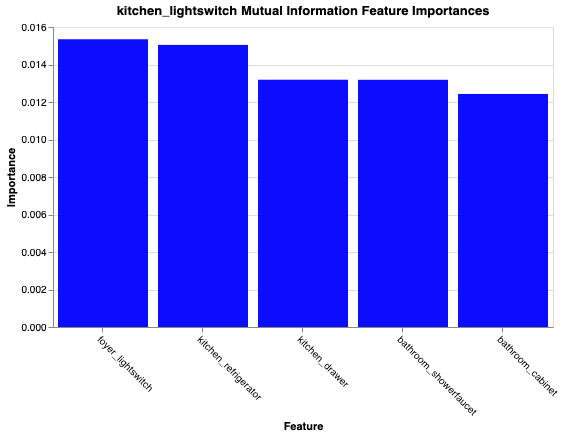

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_lightswitch

BEGIN: livingroom_lamp
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.4s finished


best params: {'criterion': 'gini', 'max_depth': 8}
best score: 0.8140311102714277
best features: ['bathroom_lightswitch' 'bathroom_door' 'kitchen_lightswitch'
 'study_drawer' 'livingroom_lightswitch']
feature importances: [0.03576137 0.0166921  0.00909767 0.00671677 0.0062853 ]


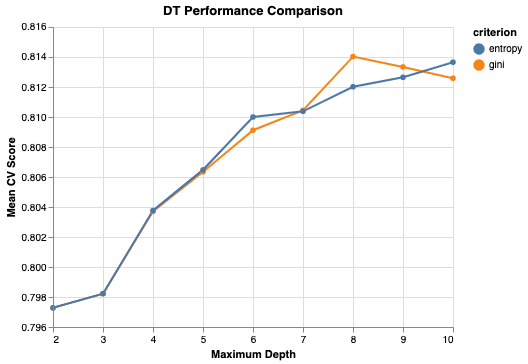

roc_auc 0.8639367488209342


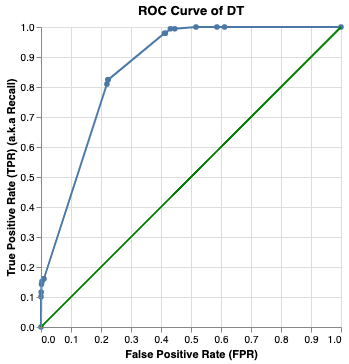

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      1252
         1.0       0.83      0.16      0.27       336

    accuracy                           0.82      1588
   macro avg       0.82      0.58      0.58      1588
weighted avg       0.82      0.82      0.76      1588

[[1241   11]
 [ 282   54]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.0s finished


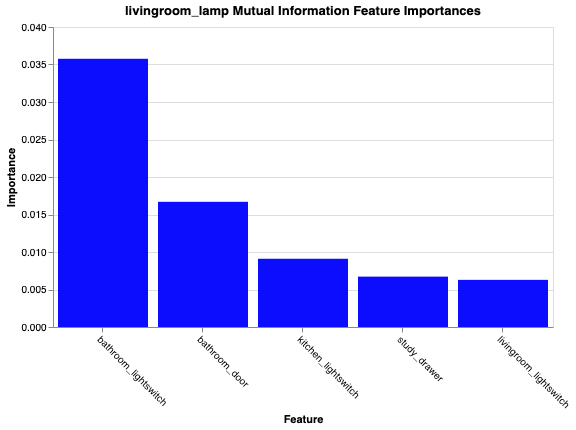

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: livingroom_lamp

BEGIN: kitchen_microwave
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.3s finished


best params: {'criterion': 'entropy', 'max_depth': 2}
best score: 0.989042131116569
best features: ['kitchen_cabinet' 'kitchen_refrigerator' 'kitchen_door'
 'bedroom_lightswitch' 'kitchen_drawer']
feature importances: [0.00294464 0.00262704 0.00262467 0.00262066 0.00209372]


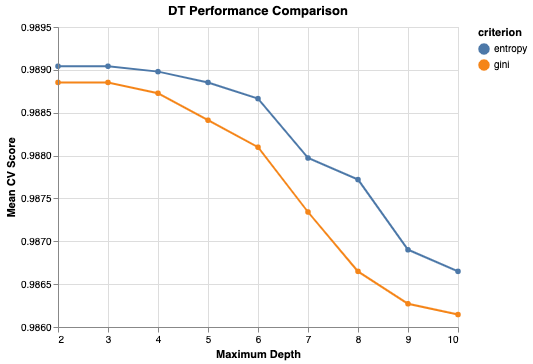

roc_auc 0.58993894993895


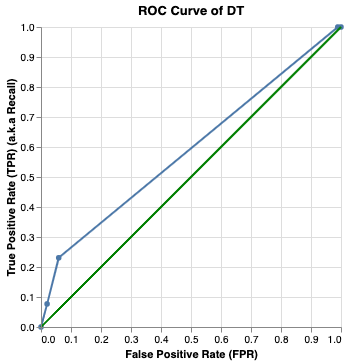

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1575
         1.0       0.00      0.00      0.00        13

    accuracy                           0.99      1588
   macro avg       0.50      0.50      0.50      1588
weighted avg       0.98      0.99      0.99      1588

[[1575    0]
 [  13    0]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.5s finished


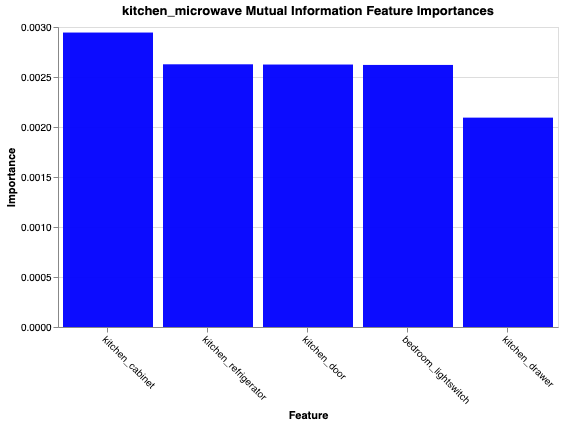

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_microwave

BEGIN: kitchen_garbagedisposal
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.4s finished


best params: {'criterion': 'gini', 'max_depth': 2}
best score: 0.9975439259399207
best features: ['livingroom_lightswitch' 'kitchen_cabinet' 'bathroom_door' 'kitchen_door'
 'livingroom_lamp']
feature importances: [0.00193147 0.00150779 0.00145307 0.0010471  0.00075247]


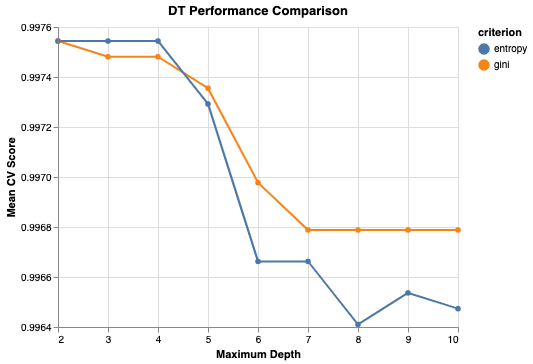

roc_auc 0.703499369482976


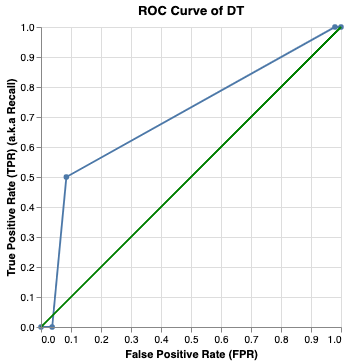

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1586
         1.0       0.00      0.00      0.00         2

    accuracy                           1.00      1588
   macro avg       0.50      0.50      0.50      1588
weighted avg       1.00      1.00      1.00      1588

[[1586    0]
 [   2    0]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    2.9s finished


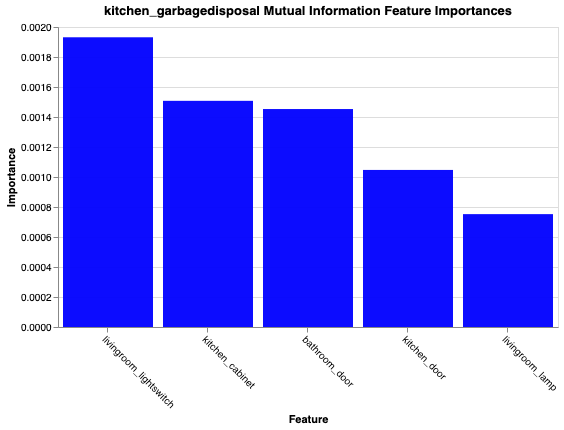

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_garbagedisposal

BEGIN: kitchen_coffeemachine
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.2s finished


best params: {'criterion': 'gini', 'max_depth': 2}
best score: 0.9986774985830342
best features: ['kitchen_toaster' 'foyer_closet' 'bathroom_showerfaucet'
 'bathroom_cabinet' 'bathroom_sinkfaucet-cold']
feature importances: [0.00575274 0.00129947 0.00067915 0.00061785 0.0005905 ]


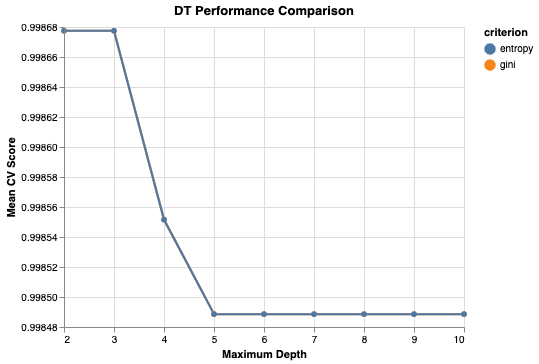

roc_auc 0.9599873976055451


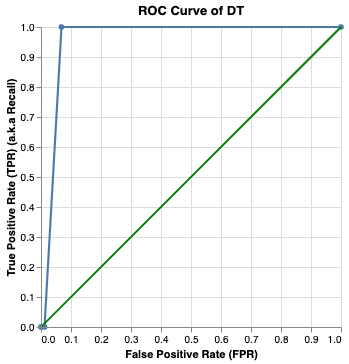

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1587
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1588
   macro avg       0.50      0.50      0.50      1588
weighted avg       1.00      1.00      1.00      1588

[[1587    0]
 [   1    0]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.1s finished


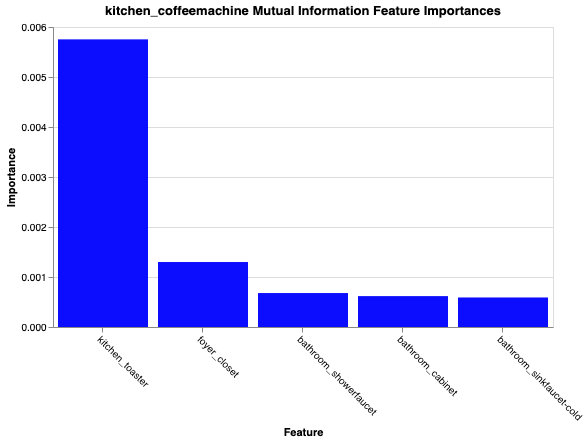

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_coffeemachine

BEGIN: livingroom_lightswitch
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.6s finished


best params: {'criterion': 'entropy', 'max_depth': 7}
best score: 0.9080546633919012
best features: ['foyer_lightswitch' 'bathroom_showerfaucet' 'bedroom_drawer'
 'livingroom_lightswitch' 'foyer_door']
feature importances: [0.0310433  0.01235251 0.01201921 0.00878839 0.00805073]


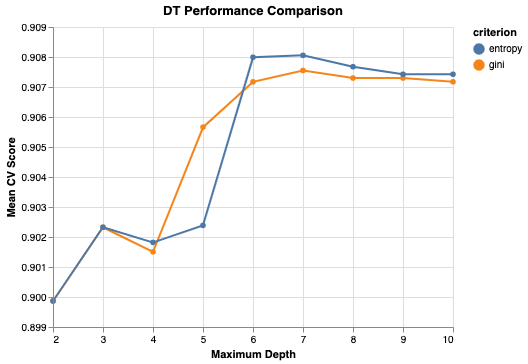

roc_auc 0.9178132098924179


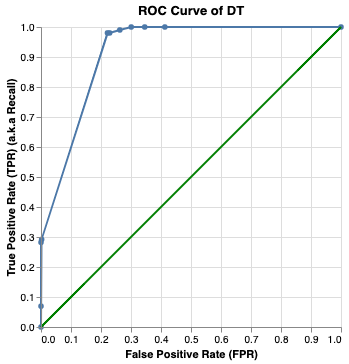

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1386
         1.0       1.00      0.28      0.44       202

    accuracy                           0.91      1588
   macro avg       0.95      0.64      0.70      1588
weighted avg       0.92      0.91      0.89      1588

[[1386    0]
 [ 145   57]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    4.0s finished


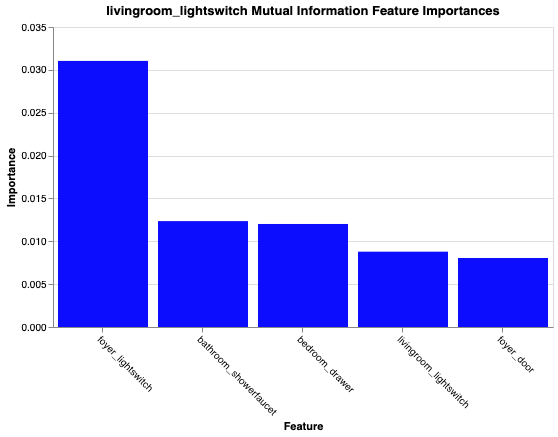

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: livingroom_lightswitch

BEGIN: kitchen_oven
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.3s finished


best params: {'criterion': 'entropy', 'max_depth': 2}
best score: 0.9951508281377921
best features: ['foyer_door' 'kitchen_drawer' 'bathroom_toiletflush'
 'bathroom_showerfaucet' 'bedroom_lightswitch']
feature importances: [0.00300822 0.00211901 0.00174409 0.00171536 0.00149031]


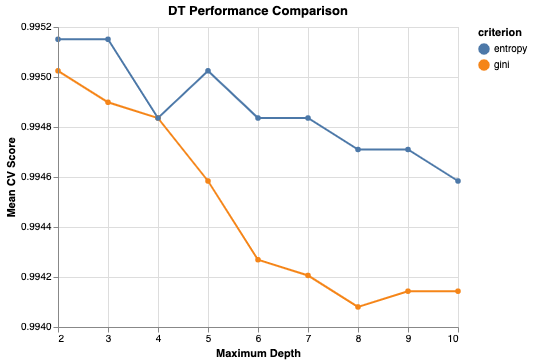

roc_auc 0.705087608190838


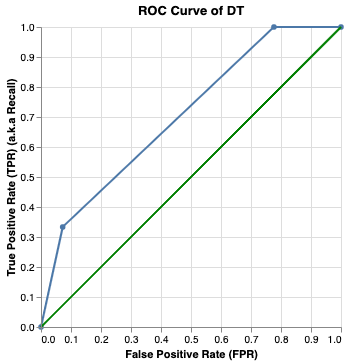

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1579
         1.0       0.00      0.00      0.00         9

    accuracy                           0.99      1588
   macro avg       0.50      0.50      0.50      1588
weighted avg       0.99      0.99      0.99      1588

[[1579    0]
 [   9    0]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.4s finished


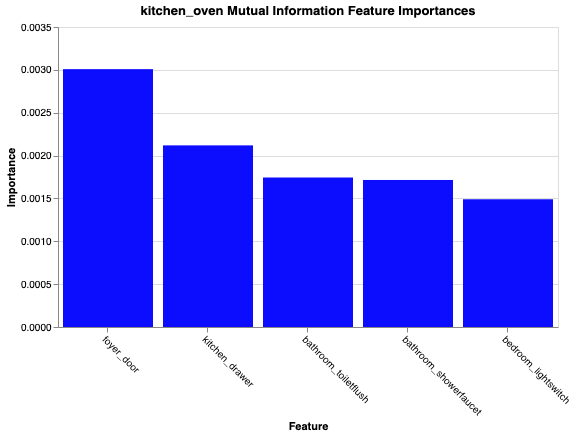

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_oven

BEGIN: kitchen_dishwasher
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.8s finished


best params: {'criterion': 'entropy', 'max_depth': 8}
best score: 0.949870898671201
best features: ['kitchen_cabinet' 'kitchen_lightswitch' 'foyer_closet' 'kitchen_burner'
 'livingroom_lightswitch']
feature importances: [0.01162256 0.00936665 0.00749699 0.0070763  0.00670537]


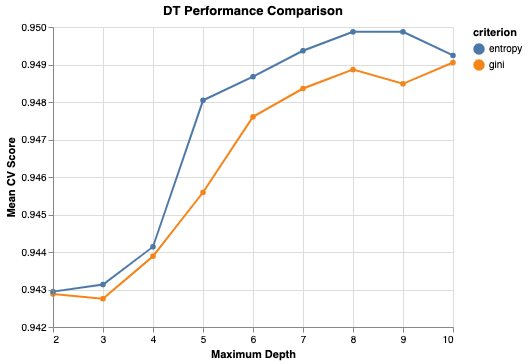

roc_auc 0.8826072425017437


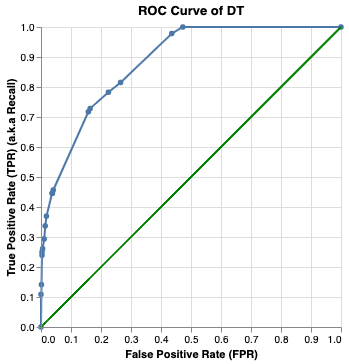

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1496
         1.0       0.75      0.26      0.39        92

    accuracy                           0.95      1588
   macro avg       0.85      0.63      0.68      1588
weighted avg       0.94      0.95      0.94      1588

[[1488    8]
 [  68   24]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    4.0s finished


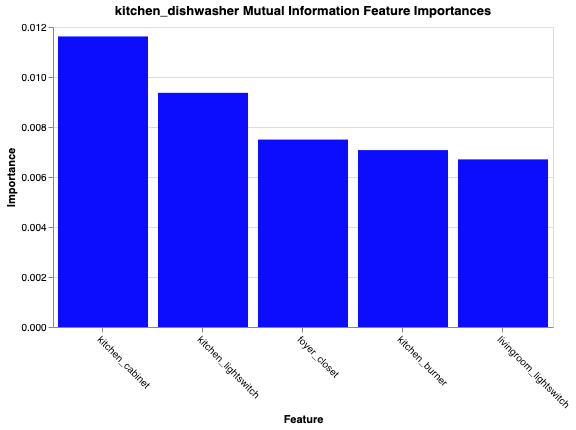

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


END: kitchen_dishwasher

BEGIN: bathroom_sinkfaucet-hot
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    5.6s finished


best params: {'criterion': 'entropy', 'max_depth': 6}
best score: 0.9702752062472448
best features: ['study_drawer' 'bathroom_toiletflush' 'bathroom_lightswitch'
 'bathroom_medicinecabinet' 'bathroom_door']
feature importances: [0.05598085 0.01155397 0.00753558 0.00753339 0.00714067]


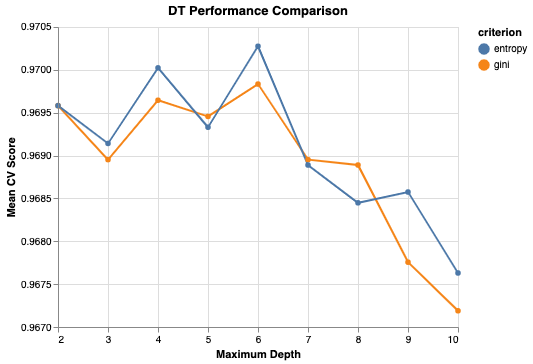

roc_auc 0.9065568210218145


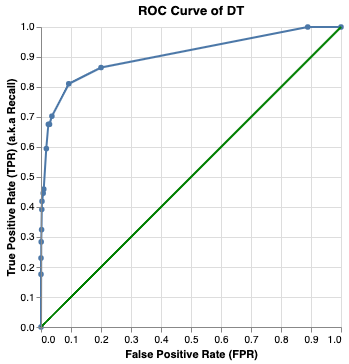

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1514
         1.0       0.86      0.42      0.56        74

    accuracy                           0.97      1588
   macro avg       0.92      0.71      0.77      1588
weighted avg       0.97      0.97      0.96      1588

[[1509    5]
 [  43   31]]
Fitting 15 folds for each of 18 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:    3.5s finished


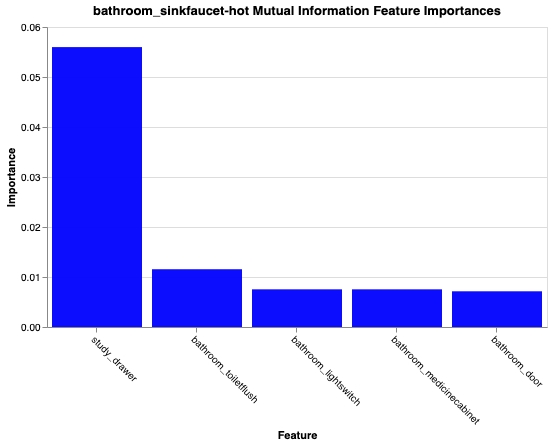

END: bathroom_sinkfaucet-hot



,Target,Original_Fit,bathroom_lightswitch,kitchen_cabinet,kitchen_dishwasher,kitchen_laundrydryer,livingroom_lightswitch,Best_Five_Fit,kitchen_door,kitchen_washingmachine,...,bathroom_cabinet,foyer_lightswitch,kitchen_drawer,kitchen_lightswitch,kitchen_burner,kitchen_coffeemachine,bedroom_lightswitch,bathroom_sinkfaucet-cold,bathroom_showerfaucet,study_drawer
0,bedroom_lightswitch,0.979596,0.023216,0.007634,0.005261,0.00519,0.004530,0.971472,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kitchen_laundrydryer,0.988035,NaN,NaN,0.002973,NaN,NaN,0.988286,0.020003,0.019078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kitchen_freezer,0.916431,NaN,NaN,NaN,NaN,0.013565,0.900686,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kitchen_toaster,0.988664,NaN,0.007696,NaN,NaN,0.002218,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bathroom_exhaustfan,0.879841,NaN,NaN,NaN,NaN,0.013314,0.870395,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
table = []

for subAct in poweredSubActs:  #[:1]
    print("BEGIN:", subAct)
    
    row = {"Target":subAct}
    
    Data = ds.drop(columns = subAct).values
    target = ds[subAct]
    D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)

    cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 3, 
                                    random_state = 999)

    dt_classifier = DecisionTreeClassifier(random_state=999)

    params_DT = {'criterion': ['gini', 'entropy'],
                 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

    gs = GridSearchCV(estimator=dt_classifier, 
                      param_grid=params_DT, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy')
    
    gs.fit(Data, target)
    print("best params:", gs.best_params_)
    print("best score:", gs.best_score_)
    #t_pred = gs.predict(D_test)
    #print(metrics.recall_score(t_test, t_pred))
    
    row['Original_Fit'] = gs.best_score_
    
    num_features = 5
    fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
    fs_fit_mutual_info.fit_transform(Data, target)
    fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
    best_features_mutual_info = ds.columns[fs_indices_mutual_info].values
    print("best features:", best_features_mutual_info)
    
    feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
    print("feature importances:", feature_importances_mutual_info)
    
    best_feats = dict(zip(best_features_mutual_info, feature_importances_mutual_info))
    row.update(best_feats)

    feats_df = pd.DataFrame(zip(best_features_mutual_info, feature_importances_mutual_info), columns=['feature', 'score'])
    feats_df.to_csv(subAct + "_best_feats.csv", index=False)
    
    results_DT = pd.DataFrame(gs.cv_results_['params'])
    results_DT['test_score'] = gs.cv_results_['mean_test_score']
    
    alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False)),
    color='criterion'
    ).display()
    
    results_DT.to_csv(subAct + "_dt.csv", index=False)
    
    t_pred = gs.predict(D_test)
    t_prob = gs.predict_proba(D_test)
    
    metrics.roc_auc_score(t_test, t_pred)
    fpr, tpr, _ = metrics.roc_curve(t_test, t_prob[:, 1])
    roc_auc = metrics.auc(fpr, tpr)    
    print('roc_auc', roc_auc)
    df = pd.DataFrame({'fpr': fpr, 'tpr': tpr})

    base = alt.Chart(df, 
                 title='ROC Curve of DT'
                ).properties(width=300)

    roc_curve = base.mark_line(point=True).encode(
        alt.X('fpr', title='False Positive Rate (FPR)',  sort=None),
        alt.Y('tpr', title='True Positive Rate (TPR) (a.k.a Recall)'),
    )

    roc_rule = base.mark_line(color='green').encode(
        x='fpr',
        y='fpr',
        size=alt.value(2)
    )

    (roc_curve + roc_rule).display()
    
    df.to_csv(subAct + "_roc.csv", index = False)
    
    print(metrics.classification_report(t_test, t_pred))
    report = metrics.classification_report(t_test, t_pred, output_dict=True)
    rep = pd.DataFrame(report).transpose()
    rep.to_csv(subAct + "_rep.csv", index=True)
    
    print(metrics.confusion_matrix(t_test, t_pred))
    report = metrics.confusion_matrix(t_test, t_pred)
    rep = pd.DataFrame(report).transpose()
    rep.to_csv(subAct + "_confusion.csv", index=True)
    
    # Now do the same calculation but with only the 5 best features in the training set
    Data = ds[best_features_mutual_info]
    target = ds[subAct]
    D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                    target, 
                                                    test_size = 0.3,
                                                    random_state=999)
    
    cv_method = RepeatedStratifiedKFold(n_splits = 5, 
                                    n_repeats = 3, 
                                    random_state = 999)

    dt_classifier = DecisionTreeClassifier(random_state=999)

    params_DT = {'criterion': ['gini', 'entropy'],
                 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

    gs = GridSearchCV(estimator=dt_classifier, 
                      param_grid=params_DT, 
                      cv=cv_method,
                      verbose=1, 
                      scoring='accuracy')
    
    gs.fit(Data, target)
#     print(gs.best_params_)
#     print(gs.best_score_)
    row['Best_Five_Fit'] = gs.best_score_
    
    table.append(row)
    
    plot = plot_imp(subAct, best_features_mutual_info, feature_importances_mutual_info, 'Mutual Information', 'blue')
    plot.display()
    print("END:", subAct)
    print()
    
ds_best_feats = pd.DataFrame(table)
ds_best_feats.head()

In [52]:
ds_best_feats

,Target,Original_Fit,bathroom_lightswitch,kitchen_cabinet,livingroom_lightswitch,kitchen_laundrydryer,kitchen_dishwasher,Best_Five_Fit,kitchen_door,kitchen_washingmachine,...,kitchen_toaster,kitchen_burner,foyer_lightswitch,kitchen_coffeemachine,kitchen_lightswitch,bathroom_sinkfaucet-hot,kitchen_oven,bathroom_exhaustfan,foyer_closet,bathroom_toiletflush
0,bedroom_lightswitch,0.979596,0.016501,0.007751,0.006758,0.005276,0.004578,0.971472,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,kitchen_laundrydryer,0.988035,NaN,NaN,NaN,NaN,0.002322,0.987720,0.01984,0.018192,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kitchen_freezer,0.916431,0.008175,0.014368,NaN,NaN,NaN,0.904213,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kitchen_toaster,0.988664,NaN,0.007070,NaN,NaN,0.004055,0.986586,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bathroom_exhaustfan,0.879841,NaN,NaN,NaN,NaN,NaN,0.878204,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,bathroom_showerfaucet,0.966937,0.004691,NaN,NaN,NaN,NaN,0.963726,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,bathroom_lightswitch,0.839222,NaN,NaN,0.028821,NaN,0.027506,0.802947,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,kitchen_refrigerator,0.964607,NaN,0.024137,0.008741,NaN,NaN,0.960514,NaN,NaN,...,0.014686,0.009794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,foyer_lightswitch,0.989420,NaN,NaN,NaN,NaN,0.008459,1.000000,NaN,NaN,...,NaN,0.030916,0.017980,0.006578,NaN,NaN,NaN,NaN,NaN,NaN
9,kitchen_burner,0.963033,NaN,NaN,0.006662,NaN,NaN,1.000000,NaN,NaN,...,NaN,0.009617,NaN,0.007768,0.011616,0.006256,NaN,NaN,NaN,NaN


### Feature Selection Using Mutual Information

The mutual information method is a filter feature selection method that looks at the relationship between each descriptive feature and the target feature using the concept of entropy.

The code below returns the indices of the 5 features that have the highest mutual information value. As in the F-score method, the wrapper is not used in any way when selecting features using the mutual information method.

In [16]:
# import datetime as dt
# def add_DAY_WDWE_phaseII(ds):
#     dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
#     dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
#     ds.set_index(ds['timestamp'], inplace = True)
#     ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
#     ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
#     ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
#     ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
#     ds.reset_index(drop = True, inplace = True)
#     ds['Hour'] = ds['timestamp'].dt.hour
#     return ds

# df = add_DAY_WDWE_phaseII(df)
# df.head()

In [17]:
# df['Phase'] = "Afternoon"
# df.loc[df['Hour'] < 9, 'Phase'] = "Morning"
# df.loc[df['Hour'] >= 17, 'Phase'] = "Evening"
# df.head()

## Can we please also have summary stats - for example, 'Washine Machine on WD morning has a mean value of X with a SD of Y'

In [35]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import feature_selection as fs
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import datetime as dt

df = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = "duration")
df.reset_index(drop = True, inplace = True)

df_sensors = pd.read_csv('S1Sensors_preprocessed.csv', index_col = None)
df_sensors = df_sensors[df_sensors.reqEnergy]

df_costs = pd.read_csv('power_costs.csv', index_col = None)

def add_DAY_WDWE_phaseII(ds):
    dayNumKeyWithDAYDict = pd.Series(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], ['0','1','2','3','4','5','6']).to_dict()
    dayNumKeyWithWDWEDict = pd.Series(['WD','WD','WD','WD','WD','WE','WE'], ['0','1','2','3','4','5','6']).to_dict()
    ds.set_index(ds['timestamp'], inplace = True)
    ds.insert((len(ds.columns)), "DAY", ds.index.dayofweek.astype(str), True)
    ds.insert((len(ds.columns)), "WDWE", ds.index.dayofweek.astype(str), True)
    ds = ds.replace({"DAY": dayNumKeyWithDAYDict})
    ds = ds.replace({"WDWE": dayNumKeyWithWDWEDict})
    ds.reset_index(drop = True, inplace = True)
    ds['Hour'] = ds['timestamp'].dt.hour
    return ds

In [37]:
ds = pd.read_csv('S1SubActivities_temporalFeaturesNoDUPES.csv', index_col = None) 
ds.start = pd.to_datetime(ds.start, format='%Y-%m-%d %H:%M:%S')
ds.end = pd.to_datetime(ds.end, format='%Y-%m-%d %H:%M:%S')
ds.head()

,subActNum,subAct,start,end,dayNumeric,DAY,WDWE,HOUR,durationSec
0,67,bathroom_cabinet,2003-03-27 06:43:40,2003-03-27 06:43:43,3,Thu,WD,6,3
1,100,bathroom_toiletflush,2003-03-27 06:44:06,2003-03-27 07:12:41,3,Thu,WD,6,1715
2,101,bathroom_lightswitch,2003-03-27 06:44:20,2003-03-27 07:46:34,3,Thu,WD,6,3734
3,57,bathroom_medicinecabinet,2003-03-27 06:44:35,2003-03-27 06:44:48,3,Thu,WD,6,13
4,57,bathroom_medicinecabinet,2003-03-27 06:44:36,2003-03-27 06:44:48,3,Thu,WD,6,12


In [39]:
ds_new = ds.copy()
ds_new['Phase'] = "Afternoon"
ds_new.loc[ds_new['HOUR'] < 9, 'Phase'] = "Morning"
ds_new.loc[ds_new['HOUR'] >= 17, 'Phase'] = "Evening"
benchmark_usage = ds_new.groupby(['subAct','WDWE','Phase'])['durationSec'].describe()
benchmark_usage

count          mean           std  \
subAct                   WDWE Phase                                          
bathroom_cabinet         WD   Afternoon   29.0    691.103448   3684.014438   
                              Evening     24.0     72.166667    339.703665   
                              Morning     25.0      4.800000      3.559026   
                         WE   Afternoon   11.0      4.181818      3.763461   
                              Evening     11.0      2.272727      1.489356   
                              Morning      4.0   6448.500000  12884.334480   
bathroom_door            WD   Afternoon   20.0    632.200000   2261.413498   
                              Evening     18.0    104.500000    201.793211   
                              Morning     13.0     45.923077     67.082613   
                         WE   Afternoon    8.0   2154.125000   6049.168454   
                              Evening     10.0    115.400000    215.446410   
                              Morning      4.0     29.000000     38.453435   
bathroom_exhaustfan      WD   Afternoon    7.0   1293.857143   1206.828962   
                              Evening      7.0    553.428571    898.082561   
                              Morning      8.0   1221.500000    929.652009   
                         WE   Afternoon    6.0   1299.000000   2502.200871   
                              Evening      3.0    383.333333    282.369144   
                              Morning      3.0   3413.333333   3234.205054   
bathroom_lightswitch     WD   Afternoon   10.0   1726.400000   3362.940948   
                              Evening     20.0   1019.650000   1963.498175   
                              Morning      8.0   1430.625000   1383.578996   
                         WE   Afternoon    6.0    585.333333    762.054766   
                              Evening      5.0   1734.200000   2795.616873   
bathroom_medicinecabinet WD   Afternoon   56.0   3814.000000   7087.517760   
                              Evening     43.0    212.093023    389.986191   
                              Morning     46.0   5092.500000  10471.167431   
                         WE   Afternoon   22.0   4758.545455   7142.136440   
                              Evening     21.0    594.523810   1632.760534   
                              Morning      6.0   7389.166667  12159.893674   
bathroom_showerfaucet    WD   Afternoon   14.0   6987.928571  12203.480377   
...                                        ...           ...           ...   
kitchen_toaster          WD   Evening     10.0     10.800000     10.271860   
                              Morning     11.0      2.272727      1.348400   
                         WE   Afternoon   20.0      8.450000     21.236699   
                              Evening      2.0      1.000000      0.000000   
                              Morning      2.0      6.000000      5.656854   
kitchen_washingmachine   WD   Afternoon   13.0     44.230769     32.189941   
                              Evening      8.0     40.875000     57.820998   
                              Morning      2.0     22.500000     14.849242   
                         WE   Afternoon   22.0     10.272727     16.779187   
                              Morning      3.0     53.000000     87.481427   
livingroom_dvd           WD   Evening      1.0      5.000000           NaN   
                         WE   Afternoon    1.0     36.000000           NaN   
livingroom_lamp          WD   Afternoon    2.0   8587.000000      0.000000   
                              Evening      2.0  10954.000000   6242.338664   
                         WE   Afternoon    1.0  19162.000000           NaN   
                              Evening      2.0   7843.500000   6620.640792   
livingroom_lightswitch   WD   Afternoon    1.0  24595.000000           NaN   
                              Evening      5.0   5972.600000   4051.829007   
                              Morning      1.0  45869.000000   

In [19]:
#Assuming everything that is common has been pre-processed by this stage

def calc_subAct(dataframe, subAct, wattage, df_costs):
    # Duplicate the DF to avoid corrupting it
    df = dataframe.copy()
    
    # First step is to train the classifier
    Data = df.drop(columns = subAct).values
    target = df[subAct]
    D_train, D_test, t_train, t_test = train_test_split(Data, 
                                                        target, 
                                                        test_size = 0.3,
                                                        random_state=999)
    dt_classifier = DecisionTreeClassifier(max_depth=4,
                                           criterion='entropy',
                                           random_state = 999)
    dt_classifier.fit(D_train, t_train)
    confidence = dt_classifier.score(D_test, t_test)
    df['prediction'] = dt_classifier.predict(Data)
    df['intervention'] = (df['prediction'].diff() == -1) & (df[subAct] == 1)
    
    dfIDX = pd.read_csv('S1Act_B_m_NoDupes.csv', index_col = None)
    dfIDX.duration = pd.to_datetime(dfIDX.duration, format='%Y-%m-%d %H:%M:%S')
    df['timestamp'] = dfIDX['duration']

    df = add_DAY_WDWE_phaseII(df)
    df['Phase'] = "Afternoon"
    df.loc[df['Hour'] < 12, 'Phase'] = "Morning"
    df.loc[df['Hour'] >= 18, 'Phase'] = "Evening"
    
    # Calculate approx durations
    duration = 0
    duration_col = []

    for row in df.iterrows():
        if row[1][subAct] == 1:
            duration += 1
        else:
            duration = 0

        duration_col.append(duration)

    df['duration'] = duration_col

    cancelled_interventions = 0
    completed_interventions = 0
    possible_intervention = False
    intervening = False

    total_minutes_saved = 0
    total_kwh_saved = 0
    total_dollars_saved = 0

    for row in df.iterrows():
        if row[1]['intervention'] and not intervening:
            possible_intervention = True
        if possible_intervention:
            if row[1][subAct] == 0:
                possible_intervention = False
                cancelled_interventions += 1
            else:
                if row[1]['duration'] > benchmark_usage[subAct][row[1]['WDWE']][row[1]['Phase']] / 60:
                    intervening = True
                    completed_interventions += 1
                    possible_intervention = False
        if intervening:
            if row[1][subAct] == 0:
                intervening = False
            else:
                total_minutes_saved += 1
                kwh_saved = wattage / 60
                total_kwh_saved += kwh_saved
                hour = row[1]['Hour']
                wdwe = row[1]['WDWE']
                rate = df_costs[(df_costs['Hour'] == hour) & (df_costs['WDWE'] == wdwe)].iloc[0]['cost_per_kwh']
                dollars_saved = rate * kwh_saved
                total_dollars_saved += dollars_saved

    # We see that we didn't quite save as many minutes of electricity but we likely annoyed the user less
    # Note that this means our 'confidence' value is going to be more conservative than it needs to be
    print("SubAct:",subAct)
    print("Classifier confidence:", confidence)
    print("Number of completed interventions:", completed_interventions)
    print("Number of interventions cancelled due to not meeting average number of minutes usage:", 
          cancelled_interventions)
    print("Total minutes saved:", total_minutes_saved)
    print("Total minutes saved, accounting for confidence:", total_minutes_saved * confidence)
    print("Total electricity saved (kwh):", total_kwh_saved)
    print("Total electricity saved, accounting for confidence (kwh):", total_kwh_saved * confidence)
    print("Total money saved: $", total_dollars_saved)
    print("Total money saved accounting for confidence:  $", total_dollars_saved * confidence)
    print()
    

for row in df_sensors.iterrows():
    subAct = row[1]['concat']
    wattage = row[1]['wattage']
    calc_subAct(df, subAct, wattage, df_costs)

NameError: name 'benchmark_usage' is not defined

# Discussion

<img src="https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-750x480.png" alt="Satellite-images-of-India-by-night-–-Sala-I-Martin-paper" class="wp-image-7749" srcset="https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-750x480.png 750w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-150x96.png 150w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-400x256.png 400w, https://ourworldindata.org/uploads/2013/12/Satellite-images-of-India-by-night-–-Sala-I-Martin-paper-768x491.png 768w" sizes="(max-width: 750px) 100vw, 750px">

In [20]:
# !jt -l
# !jt -t <theme>
# !jt -r